# Airlines Problem

With heirarchical clustering method

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [ ]:
df = pd.read_csv('EastWestAirlines.csv')

In [ ]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [ ]:
df1 = df.drop(['ID'], axis = 1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df1_norm=pd.DataFrame(normalize(df1),columns=df1.columns)
df1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


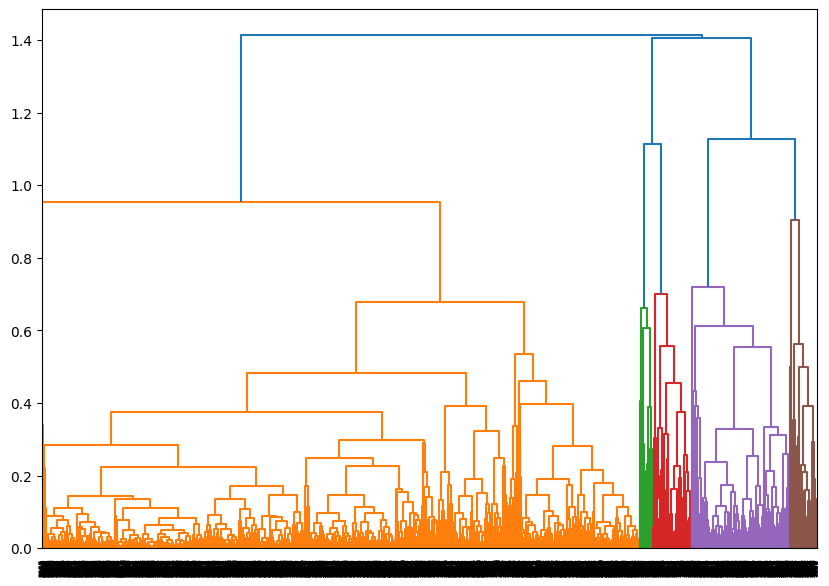

In [ ]:
plt.figure(figsize=(10,7))
dendrograms=sch.dendrogram(sch.linkage(df1_norm,'complete'))

In [ ]:
#Here we see that since the dedrogram makes 5 clusters initially, we go with the number of clusters as 5.

In [ ]:
hclusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
hclusters

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
y = pd.DataFrame(hclusters.fit_predict(df1_norm), columns=['clusterid'])
y['clusterid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    3086
1     509
3     197
2     137
4      70
Name: clusterid, dtype: int64

In [ ]:
df1['clusterid'] = hclusters.labels_
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [ ]:
#The inference we made from this clustering process is that the optimal number of clusters were 5 as potrayed by the dedrogram
#The predictions made by the clustering model shows that the maximum number of passengers fall under cluster id 0

With Kmeans clustering method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (1).csv


In [ ]:
air = pd.read_csv('EastWestAirlines (1).csv')

In [ ]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
air1 = air.drop(['ID'], axis = 1)

In [ ]:
air1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
air_sc = sc.fit_transform(air1)

In [ ]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(air_sc)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

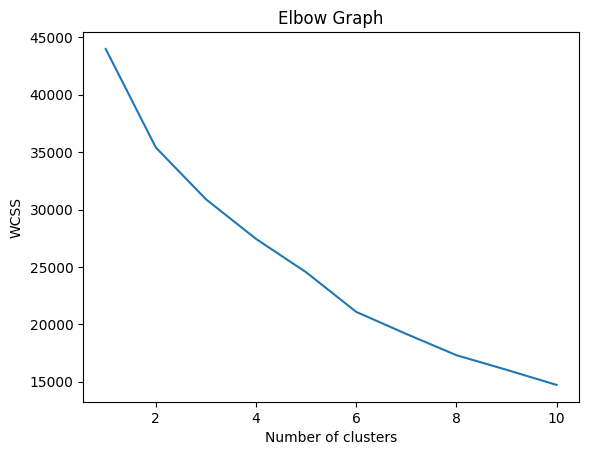

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(6,random_state=0).fit(air_sc)
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
air1['clusterid'] = kmeans.labels_

In [ ]:
air1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
air1['clusterid'].value_counts()

2    2494
1    1243
0     143
5      61
3      43
4      15
Name: clusterid, dtype: int64

In [ ]:
#According to the wcss elbow graph the most optimal number of clusters to be made was 6 since a significan bend in the graph can be seen, an elbow is formed.
#According to the kmeans model we see that the maximum number of passengers belonged to cluster id 2

DBScan method

In [3]:
from sklearn.cluster import DBSCAN

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [4]:
data = pd.read_csv('EastWestAirlines.csv')

In [6]:
data1 = data.drop(['ID'], axis = 1)

In [7]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data1_scal = sc.fit_transform(data1)


In [21]:
data1_scal

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [22]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(data1_scal)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [25]:
cl.value_counts()

cluster
 0         3898
-1           51
 2           25
 1           14
 3            5
 4            3
 5            3
dtype: int64

In [ ]:
#As we can see dbscan model created 6 clusters with maximum values in cluster 0 and 51 outliers.